In [53]:
import numpy as np 
import cv2 as cv  
dataset_dir = 'Dataset'
import math
import matplotlib.pyplot as plt 

def load_intensSources():

    
   
    path =  proj_dir+"/light_intensities.txt"
    intensity_matrix = np.ndarray((96,3))
    all = []
    with open(path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            row = list(line.strip().split(" "))
            
            float_row = []
            for item in row:
                float_row.append(float(item))
        
            all.append(float_row)
            
    intensity_matrix = np.array(all)
    return intensity_matrix

def load_objMask():
    path =  proj_dir+"/mask.png"
    img = cv.imread(path, cv.IMREAD_UNCHANGED)

    return img

def load_images():
    #n nombre d'image a importer (max 96)
    i=0
    n=96 ## Just to test ... 
    intensSourcesMatrix = load_intensSources()
    file= open(proj_dir+"/filenames.txt",'r')  
    val = pow(2,16)-1
    #depending on data
    h=512
    w=612
    imagesMatrix=np.ndarray((96,h*w*3))
    m = load_intensSources()
    for i in range(n):
        #read the file that contains the images name (images in 16bits)
        #read one image -> get the name from filenames.txt
        imageName= file.readline()
        #print("treating image : " + imageName)
        pathToImage= str(proj_dir+imageName).strip()
        image = cv.imread(pathToImage,-1)
        if image is None: 
            print("image is none")
        else:
            #changer d'intrevale 
            imageRes=rescale(image)

            ## out of loop 
            #m = load_intensSources()
            ## 
            intensite  = [m[i][0] ,m[i][1],m[i][2]]
            imageRes=divIntensite(imageRes,intensite)
            imageRes=imageToOneLine(imageRes)

            
            imagesMatrix[i]=imageRes
    print(imagesMatrix.shape)
    return imagesMatrix
            
            
    
#positions des sources lumineuses
def load_lightSources():
    path=(proj_dir+"/light_directions.txt")
    i=0
    all = []
    
    with open(path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            row = list(line.strip().split(" "))
            float_row = []

            for item in row:
                float_row.append(float(item))
            all.append(float_row) 


    light_directionsMatrix = np.array(all)
    print(light_directionsMatrix.shape)
    return light_directionsMatrix

def rescale(image):
    return image.astype('float32') / (2**16 -1)

def divIntensite(image , intensite):
    # l’intensité (B/intB, G/intG, R/intR)
    #intenisté array of 3 values ( int B , int G , int R)
    #image X , Line X dans fichier d'intensité 
    h = image.shape[0]
    w = image.shape[1]
    for y in range(h):
        for x in range(w):
        
            image[y,x][0]=image[y,x][0]/intensite[0]
            image[y,x][1]=image[y,x][1]/intensite[1]
            image[y,x][2]=image[y,x][2]/intensite[2]
            
    return image
    
def image_to_greyScale(image):
    #replace each pixel ( array ) with 1 value using this formula (NVG = 0.3 * R + 0.59 * G + 0.11 * B)
    #pixel in opencv is bgr
    h=image.shape[0]
    w=image.shape[1]
    newImage=np.zeros((h,w),np.float32)
    for y in range(h):
        for x in range(w):
            newImage[y,x]=image[y,x][0]*0.11 + image[y,x][1]*0.59 + image[y,x][2]*0.32
    return newImage

def imageToOneLine(image):
    newImage = image.reshape(1,-1)
    return newImage



"""
PART 2 
"""

def calcul_needle_map():
    obj_images = load_images() # load a matrix, each line has an image, each col a pixel
    light_sources = load_lightSources()  # load matrix of light sources, each line takes a light direction x y z
    obj_masques = load_objMask() # load an img matrix

    # calcul de la matrice light_sources pseudo inverse 
    pinv_light_sources = np.linalg.pinv(light_sources)

    # faire le produit matriciel pour trouver les vecteurs normals 
    N = np.dot(pinv_light_sources,obj_images)
    #print(N.shape) # (3, 940032)


    # create the final matrix 
    h=512
    w=612
    k = 0
    finalM  = np.ndarray((h,w,3))

    for i in range(h):
        for j in range(w):
            finalM[i,j] = N[:,k]
            k = k+1

    return  finalM,N



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


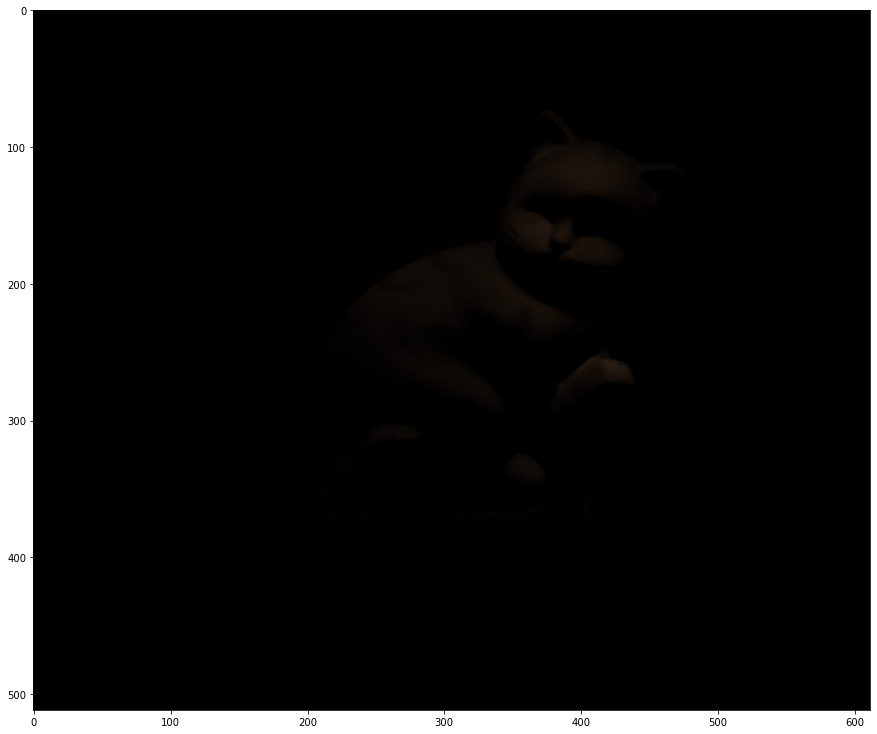

In [79]:
plt.figure(figsize=(15,15))
plt.imshow(N[1].reshape(512,612,3))

In [54]:
if __name__ == '__main__':
    #m = load_images()    #print('Please give path to the project director: /n')
    #dataset_dir = input()
    #matrix = load_intensSources()
    #print(matrix)
    #print(matrix)
    #load_images()
    #matrix  = load_lightSources()
    #print(matrix)
    #pathToImage= str('Dataset/001.png')
    #image = cv.imread(pathToImage,-1)
    #m = load_images()
    #print(m)
    #(imageToOneLine(image))
    #image_to_greyScale(image)
    #array = [1.3000, 1.5873, 2.1503]
    #(divIntensite(rescale(image), array))
    #print(rescale(image))
    final,N = calcul_needle_map()
    print(final)
    #m = load_lightSources()

    

(96, 940032)
(96, 3)
here
(512, 612, 3)
(3, 940032)
[-0.00148432 -0.00087286 -0.00029448 ...  0.00242395  0.00098389
  0.0008296 ]
[[[-1.48431922e-03 -7.83007150e-04  1.72345347e-03]
  [-8.72858694e-04 -5.28820886e-04  8.72121240e-04]
  [-2.94482442e-04 -2.38481088e-04  3.66623082e-04]
  ...
  [-1.60272078e-03 -8.47122619e-04  3.40575256e-03]
  [-9.05345976e-04 -2.45580719e-04  1.98183908e-03]
  [-5.18266519e-04 -2.02371807e-04  9.42450331e-04]]

 [[-1.62159070e-03  1.09555671e-04  3.34687416e-03]
  [-6.81503504e-04 -2.20049513e-04  1.95617910e-03]
  [-4.91484794e-04 -2.58522901e-04  9.98910406e-04]
  ...
  [-6.96279143e-05  4.78838339e-04  4.05189059e-03]
  [-1.70126435e-04  3.96923219e-05  2.11040981e-03]
  [ 5.13652608e-06  2.97962976e-04  1.18347859e-03]]

 [[ 4.98475481e-05  7.42897404e-04  3.77180680e-03]
  [-2.02918152e-05  3.12955184e-04  2.15856003e-03]
  [-1.54519755e-04  3.21156624e-04  1.24326530e-03]
  ...
  [ 6.34777447e-04 -6.86981363e-04  1.80262803e-03]
  [-5.04187994e

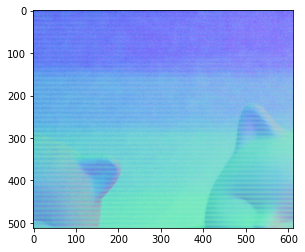

In [95]:
plt.imshow(final.astype(int))

In [55]:
## Normalisation, N values between -1 and 1
for i in range (512):
    for j in range (612):
        nx = final[i,j][0]
        ny = final[i,j][1]
        nz = final[i,j][2]
        N_len =  math.sqrt(nx*nx + ny*ny +nz*nz)
        final[i,j] = [nx/N_len, ny/N_len, nz/N_len] 



In [57]:
## Afin d’afficher les coordonnées de vecteur normal il est necessaire de  changer l’intervalle à [0, 255]

for i in range (512):
    for j in range (612):
        for k in range (3):
            x = final[i,j][k]
            final[i,j][k] = ((x+1)/2)*255
    

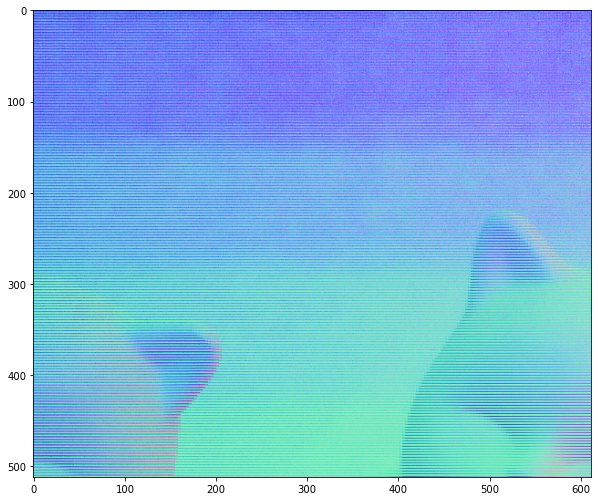

In [60]:
plt.figure(figsize =(10,10))
int_array = final. astype(int)
plt.imshow(int_array)

In [23]:
# appliquer le mask 
def load_objMask():
    path =  proj_dir+"/mask.png"
    img = cv.imread(path, cv.IMREAD_UNCHANGED)

    return img
obj_masques = load_objMask() # load an img matrix
print(obj_masques)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
## appliquation du mask 
for i in range (512):
    for j in range (612):
        # if pix is black 
        if  obj_masques[i,j] == 0:
            # normal vect blacked 
            int_array[i,j] = [0,0,0]
plt.imshow(int_array)

In [ ]:
### partie 3 . Intégration des normales pour déterminer Z (1.5 pts) :
